In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1CeuHe-yMRexmmzduDTq2mUcuVRY16wE8'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 
#https://drive.google.com/file/d/1CeuHe-yMRexmmzduDTq2mUcuVRY16wE8/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dt=pd.read_csv("train.csv")

In [ ]:
dt.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [ ]:
dt.shape

(31647, 18)

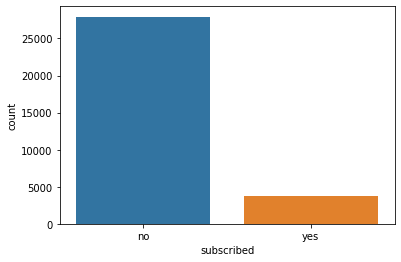

In [ ]:
import seaborn as sns
count_plt=sns.countplot(x='subscribed',data=dt)

In [ ]:
dt['job'].nunique()

12

In [ ]:
#dt.groupby('job').nunique()

In [ ]:
dt.groupby('job')['job'].count()
#dt.groupby('job').size()

job
admin.           3631
blue-collar      6842
entrepreneur     1008
housemaid         874
management       6639
retired          1574
self-employed    1123
services         2903
student           635
technician       5307
unemployed        905
unknown           206
Name: job, dtype: int64

In [ ]:
dt.groupby('marital')['marital'].count()

marital
divorced     3630
married     19095
single       8922
Name: marital, dtype: int64

In [ ]:
dt.groupby('education')['education'].count()

education
primary       4808
secondary    16224
tertiary      9301
unknown       1314
Name: education, dtype: int64

In [ ]:
dt.groupby('default')['default'].count()

default
no     31062
yes      585
Name: default, dtype: int64

In [ ]:
dt.groupby('housing')['housing'].count()

housing
no     14063
yes    17584
Name: housing, dtype: int64

In [ ]:
dt.groupby('loan')['loan'].count()

loan
no     26516
yes     5131
Name: loan, dtype: int64

In [ ]:
dt.groupby('contact')['contact'].count()

contact
cellular     20423
telephone     2047
unknown       9177
Name: contact, dtype: int64

In [ ]:
dt.groupby('month')['month'].count()

month
apr    2055
aug    4333
dec     157
feb    1827
jan     977
jul    4844
jun    3738
mar     342
may    9669
nov    2783
oct     512
sep     410
Name: month, dtype: int64

In [ ]:
dt.groupby('poutcome')['poutcome'].count()

poutcome
failure     3362
other       1288
success     1068
unknown    25929
Name: poutcome, dtype: int64

In [ ]:
dt.groupby('subscribed')['subscribed'].count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [ ]:
dt.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
dt_new=pd.get_dummies(data=dt, columns=['job', 'marital','education','default','housing','loan','contact','month','poutcome'])

In [ ]:
dt_new.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,yes,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dt_new.drop(['job_unknown', 'education_unknown','contact_unknown','poutcome_unknown'], axis = 1,inplace=True) 

In [ ]:
dt_new.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,26110,56,1933,19,44,2,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,43962,57,3287,22,867,1,84,3,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,29842,31,119,4,380,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
factors=pd.factorize(dt_new['subscribed'])

In [ ]:
factors

(array([0, 0, 0, ..., 0, 0, 1]), Index(['no', 'yes'], dtype='object'))

In [ ]:
len(factors[1])

2

In [ ]:
factors[1]

Index(['no', 'yes'], dtype='object')

In [ ]:
dt_new.subscribed=factors[0]

In [ ]:
dt_new

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,26110,56,1933,19,44,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,43962,57,3287,22,867,1,84,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,29842,31,119,4,380,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31643,40178,53,380,5,438,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
31644,19710,32,312,7,37,3,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
31645,38556,57,225,15,22,7,337,12,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
dt_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   31647 non-null  int64
 1   age                  31647 non-null  int64
 2   balance              31647 non-null  int64
 3   day                  31647 non-null  int64
 4   duration             31647 non-null  int64
 5   campaign             31647 non-null  int64
 6   pdays                31647 non-null  int64
 7   previous             31647 non-null  int64
 8   subscribed           31647 non-null  int64
 9   job_admin.           31647 non-null  uint8
 10  job_blue-collar      31647 non-null  uint8
 11  job_entrepreneur     31647 non-null  uint8
 12  job_housemaid        31647 non-null  uint8
 13  job_management       31647 non-null  uint8
 14  job_retired          31647 non-null  uint8
 15  job_self-employed    31647 non-null  uint8
 16  job_services         3

In [ ]:
import pickle
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(dt_new,"trans_tr_data.pkl")

['trans_tr_data.pkl']

In [ ]:
clean_train_dt = drive.CreateFile({'parents':[{u'id': '1FRi2c6DlbWX4Bmtxt18N1iDtlS1UcgdM'}]})
clean_train_dt.SetContentFile('trans_tr_data.pkl')
clean_train_dt.Upload() 

In [ ]:
loaded_tr_data=joblib.load("trans_tr_data.pkl")

In [ ]:
loaded_tr_dataa

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,26110,56,1933,19,44,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,43962,57,3287,22,867,1,84,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,29842,31,119,4,380,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31643,40178,53,380,5,438,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
31644,19710,32,312,7,37,3,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
31645,38556,57,225,15,22,7,337,12,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
type(loaded_tr_data)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing    

In [ ]:
dt.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
dt_le=dt.copy()

In [ ]:
dt_le

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [ ]:
#dt_le['job_le']=le.fit_transform(dt_le['job'])
#le_job_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_job_mapping)

In [ ]:
dt_le['marital_le']=le.fit_transform(dt_le['marital'])
le_marital_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_marital_mapping)

{'divorced': 0, 'married': 1, 'single': 2}


In [ ]:
dt_le['default_le']=le.fit_transform(dt_le['default'])
le_default_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_default_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le['housing_le']=le.fit_transform(dt_le['housing'])
le_housing_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_housing_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le['loan_le']=le.fit_transform(dt_le['loan'])
le_loan_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_loan_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le['contact_le']=le.fit_transform(dt_le['contact'])
le_contact_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_contact_mapping)

{'cellular': 0, 'telephone': 1, 'unknown': 2}


In [ ]:
dt_le['month_le']=le.fit_transform(dt_le['month'])
le_month_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_month_mapping)

{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}


In [ ]:
dt_le['poutcome_le']=le.fit_transform(dt_le['poutcome'])
le_poutcome_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_poutcome_mapping)

{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}


In [ ]:
dt_le['subscribed_le']=le.fit_transform(dt_le['subscribed'])
le_subscribed_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_subscribed_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,1,0,0,0,1,9,3,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,1,0,0,0,0,5,3,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,1,0,1,0,0,5,3,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,0,0,0,0,0,6,2,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,1,0,1,0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no,2,0,1,0,0,8,3,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes,0,0,0,1,0,6,3,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no,2,0,0,0,0,1,3,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no,1,0,1,0,1,8,0,0


In [ ]:
dt_le.drop(['marital','education','default','housing','loan','contact','month','poutcome','subscribed'], axis = 1,inplace=True) 

In [ ]:
dt_le

,ID,age,job,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le
0,26110,56,admin.,1933,19,44,2,-1,0,1,0,0,0,1,9,3,0
1,40576,31,unknown,3,20,91,2,-1,0,1,0,0,0,0,5,3,0
2,15320,27,services,891,18,240,1,-1,0,1,0,1,0,0,5,3,0
3,43962,57,management,3287,22,867,1,84,3,0,0,0,0,0,6,2,1
4,29842,31,technician,119,4,380,1,-1,0,1,0,1,0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,0,12,116,2,-1,0,2,0,1,0,0,8,3,0
31643,40178,53,management,380,5,438,2,-1,0,0,0,0,1,0,6,3,1
31644,19710,32,management,312,7,37,3,-1,0,2,0,0,0,0,1,3,0
31645,38556,57,technician,225,15,22,7,337,12,1,0,1,0,1,8,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [ ]:
dt_final_le=pd.get_dummies(data=dt_le, columns=['job'])

In [ ]:
dt_final_le.drop(['job_unknown'], axis = 1,inplace=True) 

In [ ]:
dt_final_le

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,26110,56,1933,19,44,2,-1,0,1,0,0,0,1,9,3,0,1,0,0,0,0,0,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,1,0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,1,0,1,0,0,5,3,0,0,0,0,0,0,0,0,1,0,0,0
3,43962,57,3287,22,867,1,84,3,0,0,0,0,0,6,2,1,0,0,0,0,1,0,0,0,0,0,0
4,29842,31,119,4,380,1,-1,0,1,0,1,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,2,0,1,0,0,8,3,0,0,0,0,0,1,0,0,0,0,0,0
31643,40178,53,380,5,438,2,-1,0,0,0,0,1,0,6,3,1,0,0,0,0,1,0,0,0,0,0,0
31644,19710,32,312,7,37,3,-1,0,2,0,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0
31645,38556,57,225,15,22,7,337,12,1,0,1,0,1,8,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
joblib.dump(dt_final_le,"final_tran_dt.pkl")

['final_tran_dt.pkl']

In [ ]:
fin_dt = drive.CreateFile({'parents':[{u'id': '1FRi2c6DlbWX4Bmtxt18N1iDtlS1UcgdM'}]})
fin_dt.SetContentFile('final_tran_dt.pkl')
fin_dt.Upload() 

In [ ]:
loaded_fin_data=joblib.load("final_tran_dt.pkl")

In [ ]:
loaded_fin_data

,ID,age,balance,day,duration,campaign,pdays,previous,marital_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,subscribed_le,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,26110,56,1933,19,44,2,-1,0,1,0,0,0,1,9,3,0,1,0,0,0,0,0,0,0,0,0,0
1,40576,31,3,20,91,2,-1,0,1,0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0
2,15320,27,891,18,240,1,-1,0,1,0,1,0,0,5,3,0,0,0,0,0,0,0,0,1,0,0,0
3,43962,57,3287,22,867,1,84,3,0,0,0,0,0,6,2,1,0,0,0,0,1,0,0,0,0,0,0
4,29842,31,119,4,380,1,-1,0,1,0,1,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,2,0,1,0,0,8,3,0,0,0,0,0,1,0,0,0,0,0,0
31643,40178,53,380,5,438,2,-1,0,0,0,0,1,0,6,3,1,0,0,0,0,1,0,0,0,0,0,0
31644,19710,32,312,7,37,3,-1,0,2,0,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0
31645,38556,57,225,15,22,7,337,12,1,0,1,0,1,8,0,0,0,0,0,0,0,0,0,0,0,1,0
